In [8]:
# -------------- IMPORT --------------
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# -------------- IMPORT --------------

# ---------- FUNCTION ----------
def debugging(key, data):
    print(f'\n{key}:\n{data}')

def persamaa_kuadrat_numpy(x):
    totalData = x.shape[0]
    noise = np.random.normal(0, 30, size=totalData)
    return x**2 + 5*x + 10 + noise
# ---------- FUNCTION ----------

# ---------- SETUP ----------
np.random.seed(42)
np.set_printoptions(precision=2, floatmode='fixed', suppress=True)
# ---------- SETUP ----------

In [9]:
# ---------- STEP 1 ----------
# buat data dummy x dan y, dengan 1 fitur dan 1 target
# ----------------------------
from doctest import debug


total_data = 200

x_train = np.linspace(-24.5, 20, total_data)
y_train = persamaa_kuadrat_numpy(x_train)
# debugging('x_train', x_train)
# debugging('y_train', y_train)

# ubah menjadi 2D array
x_train = x_train.reshape(-1, 1)
# debugging('x_train reshaped', x_train)
# ---------- STEP 1 ----------

In [10]:
# ---------- STEP 2 ----------
# 
# ----------------------------
model = Pipeline(
    steps=[
        ('polynomial_features', PolynomialFeatures(degree=2, include_bias=False)),
        ('linear_regression', LinearRegression())
    ]
)

model.fit(x_train, y_train)
y_predict = model.predict(x_train)

# debugging('x_train', x_train)
# debugging('y_train', y_train)
# debugging('y_predict', y_predict)

name_steps = model.named_steps
name_steps_key = name_steps.keys()
model_poly_features = name_steps['polynomial_features']
model_linear_regression = name_steps['linear_regression']
intercept = f"{model_linear_regression.intercept_:.2f}"
coefficients = model_linear_regression.coef_

# debugging('intercept', intercept)
# debugging('coefficients', coefficients)
# ---------- STEP 2 ----------

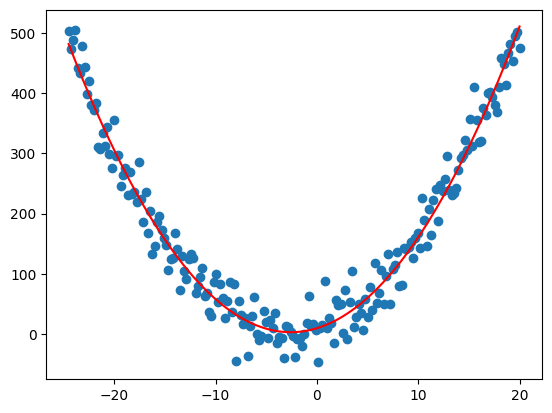

In [11]:
plt.scatter(x_train, y_train)
plt.plot(x_train, y_predict, color='red')
plt.show()


MAE:
22.02

MSE:
771.86

RMSE:
27.78

R2:
0.9663


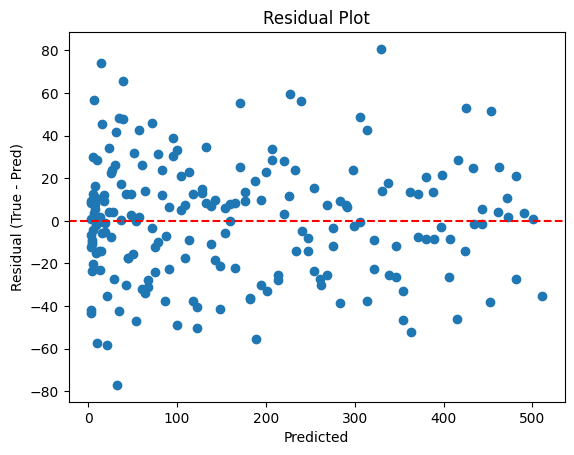

In [12]:
# ---------- STEP 4 (ERROR METRICS) ----------
# hitung error menggunakan y_train (true) dan y_predict (prediksi)
# catatan: ini metrik di data training (belum pakai train_test_split)
# -------------------------------------------
mae = mean_absolute_error(y_train, y_predict)
mse = mean_squared_error(y_train, y_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_predict)

debugging('MAE', f"{mae:.2f}")
debugging('MSE', f"{mse:.2f}")
debugging('RMSE', f"{rmse:.2f}")
debugging('R2', f"{r2:.4f}")

residual = y_train - y_predict
plt.scatter(y_predict, residual)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residual (True - Pred)')
plt.title('Residual Plot')
plt.show()
# ---------- STEP 4 (ERROR METRICS) ----------